<a href="https://colab.research.google.com/github/das2sm/computer-vision/blob/main/yolov8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from ultralytics import YOLO
import torch
import cv2
from google.colab.patches import cv2_imshow

In [4]:
# Load a pretrained YOLOv8 Nano model
model = YOLO('yolov8n.pt')

# Run inference on a test image (e.g., a sample from the web)
# Replace with your 5-10 test images (cars, pedestrians, signs)
results = model('https://i.ytimg.com/vi/fOd16PT1S7A/maxresdefault.jpg')

# The 'results' is a list of Results objects (one per image)
result = results[0]


Found https://i.ytimg.com/vi/fOd16PT1S7A/maxresdefault.jpg locally at maxresdefault.jpg
image 1/1 /content/maxresdefault.jpg: 384x640 1 cat, 2 beds, 7.7ms
Speed: 2.0ms preprocess, 7.7ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


In [5]:
# Inspecting the Box object
boxes = result.boxes
print("Box Coordinates (xyxy):", boxes.xyxy)  # [N, 4] tensor
print("Confidence Scores:", boxes.conf)        # [N] tensor
print("Class Labels:", boxes.cls)             # [N] tensor (indices)

# To see human-readable labels
for c in boxes.cls:
    print(f"Detected: {model.names[int(c)]}")

Box Coordinates (xyxy): tensor([[ 248.3209,   43.3823,  931.0098,  616.3680],
        [  20.5107,  222.5892, 1277.5220,  707.4251],
        [  62.1193,    4.1246, 1278.3910,  696.4525]], device='cuda:0')
Confidence Scores: tensor([0.5928, 0.5775, 0.2960], device='cuda:0')
Class Labels: tensor([15., 59., 59.], device='cuda:0')
Detected: cat
Detected: bed
Detected: bed


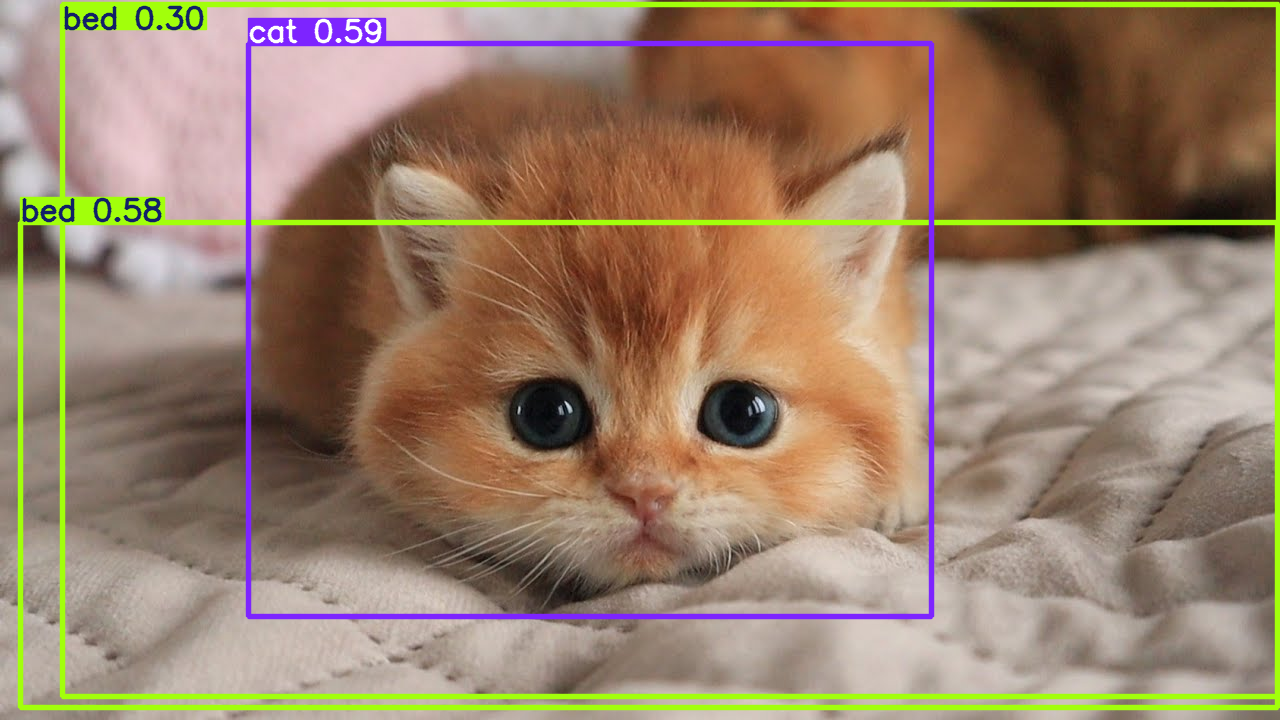

In [7]:
# 2. Plot and display
# results[0] is the first image in the batch
annotated_image = result.plot()

# Use cv2_imshow for Google Colab specifically
cv2_imshow(annotated_image)